<p style="text-align: center;">
  <img src="logo_OCR.jpg" alt="Logo Academy" width="100">
</p>
<h1 style="text-align: center;">Projet d’analyse exploratoire</h1>

# Contexte

Je suis __Data Scientist__ au sein de la start-up *academy*, qui propose des contenus de formation en ligne pour un public allant du lycée à l’université.

Mon manager, Mark, m’a présenté le projet d’expansion internationale de l’entreprise. Il m’a confié une première mission d’analyse exploratoire : déterminer si les données éducatives de la Banque Mondiale peuvent aider à orienter les choix stratégiques d’implantation à l’étranger. [Voici le lien vers le jeu de données. ](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Donn%C3%A9es+%C3%A9ducatives/Projet+Python_Dataset_Edstats_csv.zip)

[(issu du site de la Banque Mondiale). ](https://datacatalog.worldbank.org/dataset/education-statistics)



🎯 __Mon objectif__ : identifier les pays présentant un fort potentiel pour les services proposés par academy, et anticiper l’évolution de ce potentiel dans le temps.

Je vais pour cela suivre un ensemble d’exercices guidés, qui me permettront de valider si ces jeux de données fournissent des insights pertinents pour appuyer la prise de décision.

Ce premier exercice consiste à explorer les jeux de données en surface, afin d’en dégager une première compréhension.


<h1 style="text-align: center;">Partie n°1 : charger, collecter et réaliser le 1er nettoyage</h1>

## Etape 1 : Chargez les données dans le Notebook

### 1.Importation des bibliothèques

In [2]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration de l'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('default')

### 2.Chargement des données 

In [3]:
# Chargement des données
chemin_donnees = "Projet+Python_Dataset_Edstats_csv/"

# Chargement des différents fichiers
df_country = pd.read_csv(chemin_donnees + "EdStatsCountry.csv")
df_series = pd.read_csv(chemin_donnees + "EdStatsSeries.csv")
df_country_series = pd.read_csv(chemin_donnees + "EdStatsCountry-Series.csv")
df_footnote = pd.read_csv(chemin_donnees + "EdStatsFootNote.csv")
df_data = pd.read_csv(chemin_donnees + "EdStatsData.csv")

### 3.Visualisation des premières lignes

### EdStatsCountry.csv = df_country

In [4]:
print("df_country")
display(df_country.head())

# Afficher le nombre de lignes et de colonnes
print("Nombre de lignes et de colonnes :", df_country.shape)

df_country


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


Nombre de lignes et de colonnes : (241, 32)


### EdStatsSeries.csv = df_series

In [5]:
print("df_series")
display(df_series.head())

# Affichage des premières lignes et dimensions pour chaque DataFrame
print("Nombre de lignes et de colonnes :", df_series.shape)

df_series


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nombre de lignes et de colonnes : (3665, 21)


### EdStatsCountry-Series.csv = df_country_series

In [6]:
print("df_country_series")
display(df_country_series.head())

# Afficher le nombre de lignes et de colonnes
print("Nombre de lignes et de colonnes :", df_country_series.shape)

df_country_series


,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


Nombre de lignes et de colonnes : (613, 4)


### EdStatsFootNote.csv = df_footnote

In [7]:
print("df_footnote")
display(df_footnote.head())

# Afficher le nombre de lignes et de colonnes
print("Nombre de lignes et de colonnes :", df_footnote.shape)

df_footnote


,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


Nombre de lignes et de colonnes : (643638, 5)


### EdStatsData.csv = df_data

In [8]:
print("df_data")
display(df_data.head())

# Afficher le nombre de lignes et de colonnes
print("Nombre de lignes et de colonnes :", df_data.shape)

df_data


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nombre de lignes et de colonnes : (886930, 70)


### 4. Taille des jeux de données (Récapitulatif)

In [9]:
print("Taille de df_country :", df_country.shape)
print("Taille de df_series :", df_series.shape)
print("Taille de df_country_series :", df_country_series.shape)
print("Taille de df_footnote :", df_footnote.shape)
print("Taille de df_data :", df_data.shape)

Taille de df_country : (241, 32)
Taille de df_series : (3665, 21)
Taille de df_country_series : (613, 4)
Taille de df_footnote : (643638, 5)
Taille de df_data : (886930, 70)


## Etape 2 : Collectez des informations basiques sur chaque jeu de données

# 1.1 Analyse du fichier EdStatsCountry.csv

## Ce que représente une ligne
Une ligne = un pays avec ses caractéristiques et métadonnées (code, nom, région, groupe de revenu, etc.)

In [10]:
# 1. Afficher les premières lignes
display(df_country.head())

# 2. Nombre de lignes et de colonnes
print("Nombre de lignes et de colonnes :", df_country.shape)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


Nombre de lignes et de colonnes : (241, 32)


In [11]:
# 3. Nombre de doublons
print("Nombre de doublons :", df_country.duplicated().sum())

# 4. Suppression des doublons (si besoin)
df_country = df_country.drop_duplicates()

Nombre de doublons : 0


## On supprime les colonnes avec plus de 70% de valeurs manquantes

In [12]:
# 5. Proportion de valeurs manquantes par colonne
print("Proportion de valeurs manquantes par colonne :")
print(df_country.isnull().mean().sort_values(ascending=False))

# 6. Suppression des colonnes inutilisables (exemple : toutes les valeurs manquantes)
seuil = 0.7  # On supprime les colonnes avec plus de 70% de valeurs manquantes
colonnes_a_supprimer = df_country.columns[df_country.isnull().mean() > seuil]
print("Colonnes supprimées :", list(colonnes_a_supprimer))
df_country = df_country.drop(columns=colonnes_a_supprimer)

print("Nombre de lignes et de colonnes après la suppression des colonnes inutilisables :", df_country.shape)

Proportion de valeurs manquantes par colonne :
Unnamed: 31                                          1.000000
National accounts reference year                     0.867220
Alternative conversion factor                        0.804979
Other groups                                         0.759336
Latest industrial data                               0.556017
Vital registration complete                          0.539419
External debt Reporting status                       0.485477
Latest household survey                              0.414938
Latest agricultural census                           0.410788
Lending category                                     0.402490
PPP survey year                                      0.398340
Special Notes                                        0.398340
Source of most recent Income and expenditure data    0.336100
Government Accounting concept                        0.331950
Latest water withdrawal data                         0.257261
Balance of Payments Man

### Colonnes supprimées : ['National accounts reference year', 'Other groups', 'Alternative conversion factor', 'Unnamed: 31']
### On passe de (241, 32) lignes et colonnes à (241, 28).

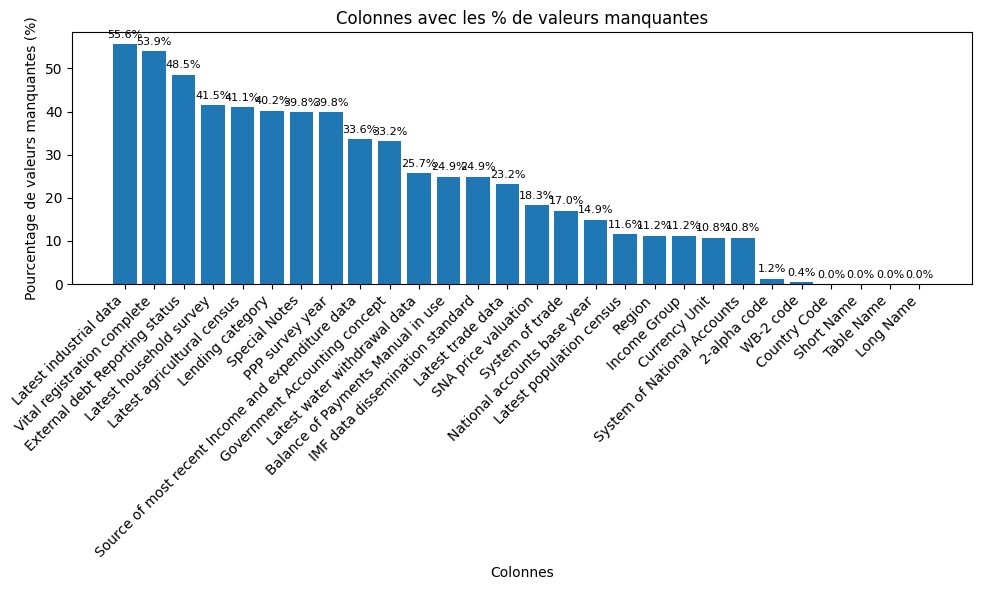

In [13]:
# Calcul du pourcentage de valeurs manquantes
missing = df_country.isnull().mean() * 100
# Trier les valeurs par ordre décroissant
missing = missing.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(missing.index, missing.values)
plt.title("Colonnes avec les % de valeurs manquantes")
plt.ylabel("Pourcentage de valeurs manquantes (%)")
plt.xlabel("Colonnes")
plt.xticks(rotation=45, ha='right')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

In [14]:
# Pour les colonnes numériques
print("Statistiques descriptives des colonnes numériques :")
print("")
print(df_country.describe())

Statistiques descriptives des colonnes numériques :

       Latest industrial data  Latest trade data
count              107.000000         185.000000
mean              2008.102804        2010.994595
std                  2.616834           2.569675
min               2000.000000        1995.000000
25%               2007.500000        2011.000000
50%               2009.000000        2012.000000
75%               2010.000000        2012.000000
max               2010.000000        2012.000000


- Toutes les colonnes restantes (`CountryCode`, `SeriesCode`, `DESCRIPTION`) sont complètes : **0% de valeurs manquantes**.
- Aucune colonne n'a été supprimée.
- Taille du dataset après nettoyage : **613 lignes et 3 colonnes**.

## Pour les données industrielles et commerciales (colonne numériques):

1. **Données industrielles (Latest industrial data)** :
   - Sur 107 pays, les données industrielles les plus récentes datent en moyenne de 2008
   - La médiane (50%) est de 2009, ce qui signifie que la moitié des pays ont des données de 2009 ou plus récentes
   - Les données s'étendent de 2000 à 2010, avec une dispersion faible (écart-type de 2.6 années)
   - 75% des pays ont des données de 2010 ou plus récentes

2. **Données commerciales (Latest trade data)** :
   - Sur 185 pays, les données commerciales les plus récentes datent en moyenne de 2011
   - La médiane est de 2012, indiquant que la moitié des pays ont des données de 2012
   - Les données s'étendent de 1995 à 2012, avec une dispersion similaire (écart-type de 2.6 années)
   - 75% des pays ont des données de 2012

En résumé, les données commerciales sont globalement plus récentes que les données industrielles, avec une couverture plus large (185 pays contre 107). Les deux ensembles de données montrent une faible dispersion, suggérant une relative homogénéité dans la fraîcheur des données par pays.

In [15]:
# Pour les colonnes catégorielles
print("\nAnalyse des colonnes catégorielles :")

# Identifier les colonnes catégorielles
colonnes_categorielles = df_country.select_dtypes(include=['object']).columns

# Afficher le nombre d'occurrences pour chaque colonne catégorielle
for colonne in colonnes_categorielles:
    print(f"\nDistribution des valeurs pour la colonne '{colonne}':")
    print(df_country[colonne].value_counts())
    print("\n" + "-"*30)


Analyse des colonnes catégorielles :

Distribution des valeurs pour la colonne 'Country Code':
Country Code
ABW    1
AFG    1
AGO    1
ALB    1
AND    1
      ..
XKX    1
YEM    1
ZAF    1
ZMB    1
ZWE    1
Name: count, Length: 241, dtype: int64

------------------------------

Distribution des valeurs pour la colonne 'Short Name':
Short Name
Aruba           1
Afghanistan     1
Angola          1
Albania         1
Andorra         1
               ..
Kosovo          1
Yemen           1
South Africa    1
Zambia          1
Zimbabwe        1
Name: count, Length: 241, dtype: int64

------------------------------

Distribution des valeurs pour la colonne 'Table Name':
Table Name
Aruba           1
Afghanistan     1
Angola          1
Albania         1
Andorra         1
               ..
Kosovo          1
Yemen, Rep.     1
South Africa    1
Zambia          1
Zimbabwe        1
Name: count, Length: 241, dtype: int64

------------------------------

Distribution des valeurs pour la colonne 'Long N

## Colonnes Principales (colonnes catégorielles)
Le DataFrame contient les informations suivantes pour chaque pays :
- Code pays unique
- Nom court du pays
- Nom complet du pays
- Région géographique
- Groupe de revenu
- Devise nationale
- Autres métadonnées spécifiques au pays

# 1.2 Analyse du fichier EdStatsSeries.csv


- **Ce que représente une ligne** : une ligne = pour définir les indicateurs

In [16]:
# 1. Afficher les premières lignes
display(df_series.head())

# 2. Nombre de lignes et de colonnes
print("Nombre de lignes et de colonnes :", df_series.shape)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nombre de lignes et de colonnes : (3665, 21)


In [17]:
# 3. Nombre de doublons
print("Nombre de doublons :", df_series.duplicated().sum())

# 4. Suppression des doublons (si besoin)
df_series = df_series.drop_duplicates()

Nombre de doublons : 0


## On supprime les colonnes avec plus de 70% de valeurs manquantes

In [18]:
# Pour df_series
print("Proportion de valeurs manquantes par colonne :")
print(df_series.isnull().mean().sort_values(ascending=False))

seuil = 0.7  # On supprime les colonnes avec plus de 70% de valeurs manquantes
colonnes_a_supprimer = df_series.columns[df_series.isnull().mean() > seuil]
print("Colonnes supprimées :", list(colonnes_a_supprimer))
df_series = df_series.drop(columns=colonnes_a_supprimer)

print("Nombre de lignes et de colonnes après la suppression des colonnes inutilisables :", df_series.shape)

Proportion de valeurs manquantes par colonne :
Other web links                        1.000000
Unnamed: 20                            1.000000
License Type                           1.000000
Notes from original source             1.000000
Unit of measure                        1.000000
Related indicators                     1.000000
Development relevance                  0.999181
General comments                       0.996180
Limitations and exceptions             0.996180
Statistical concept and methodology    0.993724
Aggregation method                     0.987176
Periodicity                            0.972988
Related source links                   0.941337
Base Period                            0.914325
Other notes                            0.849386
Short definition                       0.411733
Series Code                            0.000000
Long definition                        0.000000
Indicator Name                         0.000000
Topic                                  0.

### On passe de (3665, 21) lignes et colonnes à (3665, 6).

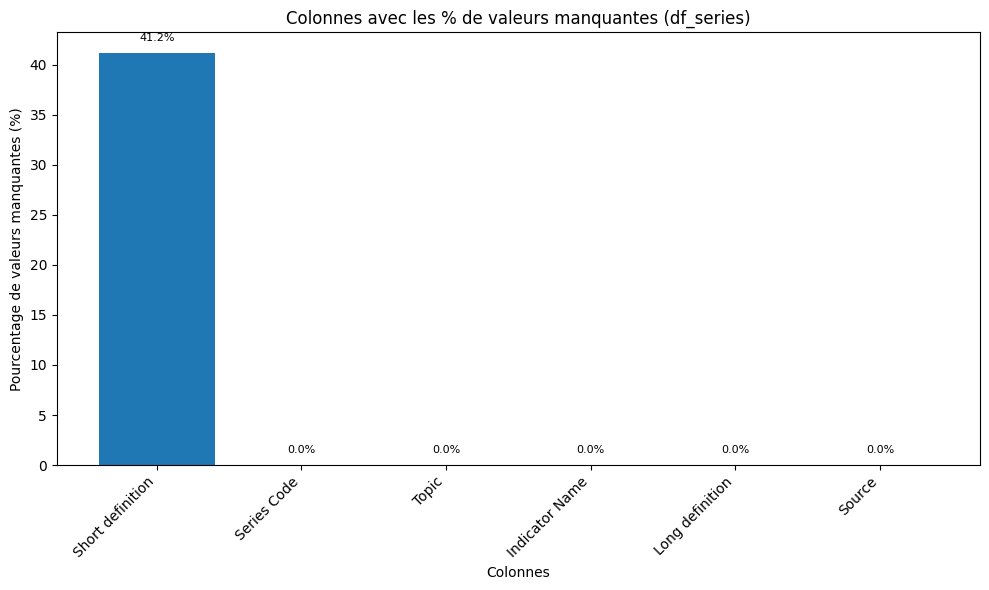

In [19]:
# Calcul du pourcentage de valeurs manquantes pour df_series
missing_series = df_series.isnull().mean() * 100

# Trier les valeurs par ordre décroissant
missing_series = missing_series.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars_series = plt.bar(missing_series.index, missing_series.values)
plt.title("Colonnes avec les % de valeurs manquantes (df_series)")
plt.ylabel("Pourcentage de valeurs manquantes (%)")
plt.xlabel("Colonnes")
plt.xticks(rotation=45, ha='right')

# Annoter les barres avec les valeurs
for bar in bars_series:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


In [20]:
# Statistiques descriptives pour df_series
print("Statistiques descriptives des colonnes numériques de df_series :")
print("")
print(df_series.describe())


Statistiques descriptives des colonnes numériques de df_series :

                        Series Code              Topic  \
count                          3665               3665   
unique                         3665                 37   
top     XGDP.56.FSGOV.FDINSTADM.FFD  Learning Outcomes   
freq                              1               1046   

                                           Indicator Name  \
count                                                3665   
unique                                               3665   
top     Government expenditure in tertiary institution...   
freq                                                    1   

                                         Short definition  \
count                                                2156   
unique                                               1169   
top     Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
freq                                                  215   

                               

## Analyse rapide des statistiques descriptives de `df_series`

Le dataset `df_series` contient principalement des colonnes textuelles (type `object`), comme :

- `Series Code`
- `Topic`
- `Indicator Name`
- `Short definition`
- `Long definition`
- `Source`

Lorsque j'exécute `df_series.describe()`, pandas me retourne donc des statistiques adaptées aux colonnes textuelles :
- `count` : nombre total de valeurs non nulles
- `unique` : nombre de valeurs uniques
- `top` : valeur la plus fréquente
- `freq` : fréquence de la valeur la plus fréquente

Il n'y a pas de colonnes numériques détectées automatiquement dans ce dataframe. Les statistiques classiques (`mean`, `std`, etc.) ne sont donc pas calculées ici.


In [21]:
# Pour les colonnes catégorielles de df_series
print("\nAnalyse des colonnes catégorielles de df_series :")

# Identifier les colonnes catégorielles
colonnes_categorielles_series = df_series.select_dtypes(include=['object']).columns

# Afficher le nombre d'occurrences pour chaque colonne catégorielle
for colonne in colonnes_categorielles_series:
    print(f"\nDistribution des valeurs pour la colonne '{colonne}':")
    print(df_series[colonne].value_counts())
    print("\n" + "-"*30)



Analyse des colonnes catégorielles de df_series :

Distribution des valeurs pour la colonne 'Series Code':
Series Code
XGDP.56.FSGOV.FDINSTADM.FFD    1
UIS.XUNIT.PPPCONST.3.FSGOV     1
UIS.XUNIT.PPPCONST.23.FSGOV    1
UIS.XUNIT.PPPCONST.2.FSGOV     1
UIS.XUNIT.PPPCONST.1.FSGOV     1
                              ..
BAR.NOED.2024.ZS               1
BAR.NOED.2024.FE.ZS            1
BAR.NOED.15UP.ZS               1
BAR.NOED.15UP.FE.ZS            1
BAR.NOED.1519.ZS               1
Name: count, Length: 3665, dtype: int64

------------------------------

Distribution des valeurs pour la colonne 'Topic':
Topic
Learning Outcomes                                                                               1046
Attainment                                                                                       733
Education Equality                                                                               426
Secondary                                                                            

##  Analyse exploratoire du dataset `df_series`

- Nombre de lignes et de colonnes avant nettoyage : **3665 lignes, 21 colonnes**.
- Aucun doublon détecté.
- Très forte proportion de valeurs manquantes sur de nombreuses colonnes descriptives (plusieurs colonnes avec 100% de valeurs manquantes).
- Les colonnes non exploitables (avec 100% ou quasi 100% de valeurs manquantes) ont été supprimées.
- Nombre de colonnes après nettoyage : **6 colonnes conservées**.

### Colonnes principales conservées :
- `Series Code`
- `Topic`
- `Indicator Name`
- `Short definition`
- `Long definition`
- `Source`

### Statistiques descriptives (colonnes catégorielles) :
- `Series Code` : 3665 valeurs uniques (chaque série est unique).
- `Topic` : 37 thèmes différents. Les plus fréquents :
  - **Learning Outcomes** (1046 occurrences)
  - **Attainment** (733 occurrences)
  - **Education Equality** (426 occurrences)
- `Indicator Name` : 3665 indicateurs uniques.
- `Short definition` et `Long definition` contiennent des définitions plus ou moins longues des indicateurs.
- `Source` : 31 sources différentes. La plus fréquente :
  - **UNESCO Institute for Statistics** (1269 occurrences).

### 📝 Conclusion :
Le dataset `df_series` contient essentiellement des métadonnées sur les indicateurs disponibles (codes, définitions, sources). Il servira principalement à décrire et comprendre les indicateurs utilisés dans les autres datasets de données chiffrées.


## Pour df_country_series

# 1.3 Analyse du fichier EdStatsCountry-Series.csv

## Ce que représente une ligne
Une ligne contient essentiellement des liens entre pays et indicateurs démographiques, avec des descriptions précisant les sources ou les spécificités du calcul des indicateurs selon les pays.


In [22]:
# 1. Afficher les premières lignes de df_country_series
display(df_country_series.head())

# 2. Nombre de lignes et de colonnes de df_country_series
print("Nombre de lignes et de colonnes :", df_country_series.shape)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


Nombre de lignes et de colonnes : (613, 4)


In [23]:
# 3. Nombre de doublons
print("Nombre de doublons :", df_country_series.duplicated().sum())

# 4. Suppression des doublons (si besoin)
df_country_series = df_country_series.drop_duplicates()

Nombre de doublons : 0


## On supprime les colonnes avec plus de 70% de valeurs manquantes

In [24]:
# 5. Proportion de valeurs manquantes par colonne pour df_country_series
print("Proportion de valeurs manquantes par colonne :")
missing_country_series = df_country_series.isnull().mean().sort_values(ascending=False)
print(missing_country_series)

# 6. Suppression des colonnes inutilisables (exemple : toutes les valeurs manquantes)
seuil_country_series = 0.7  # On supprime les colonnes avec plus de 70% de valeurs manquantes
colonnes_a_supprimer_country_series = df_country_series.columns[df_country_series.isnull().mean() > seuil_country_series]
print("Colonnes supprimées :", list(colonnes_a_supprimer_country_series))
df_country_series = df_country_series.drop(columns=colonnes_a_supprimer_country_series)

print("Nombre de lignes et de colonnes après la suppression des colonnes inutilisables :", df_country_series.shape)


Proportion de valeurs manquantes par colonne :
Unnamed: 3     1.0
CountryCode    0.0
SeriesCode     0.0
DESCRIPTION    0.0
dtype: float64
Colonnes supprimées : ['Unnamed: 3']
Nombre de lignes et de colonnes après la suppression des colonnes inutilisables : (613, 3)


- Toutes les colonnes restantes (`CountryCode`, `SeriesCode`, `DESCRIPTION`) sont complètes : **0% de valeurs manquantes**.
- Aucune colonne n'a été supprimée.
- Taille du dataset après nettoyage : **613 lignes et 3 colonnes**.

In [25]:
# Pour les colonnes numériques de df_country_series
print("Statistiques descriptives des colonnes numériques de df_country_series :")
print()
print(df_country_series.describe())


Statistiques descriptives des colonnes numériques de df_country_series :

       CountryCode   SeriesCode  \
count          613          613   
unique         211           21   
top            GEO  SP.POP.TOTL   
freq            18          211   

                                              DESCRIPTION  
count                                                 613  
unique                                                 97  
top     Data sources : United Nations World Population...  
freq                                                  154  


- `CountryCode` : 211 pays distincts, le plus fréquent : **GEO** (18 occurrences).
- `SeriesCode` : 21 indicateurs distincts, le plus fréquent : **SP.POP.TOTL** (211 occurrences).
- `DESCRIPTION` : 97 descriptions uniques, la plus fréquente apparaît 154 fois.

L'ensemble des colonnes sont de type catégoriel.

In [26]:
# Analyse des colonnes catégorielles de df_country_series
print("\nAnalyse des colonnes catégorielles de df_country_series :")

# Identifier les colonnes catégorielles (type object)
colonnes_categorielles_country_series = df_country_series.select_dtypes(include=['object']).columns

# Afficher le nombre d'occurrences pour chaque valeur unique dans chaque colonne catégorielle
for colonne in colonnes_categorielles_country_series:
    print(f"\nDistribution des valeurs pour la colonne '{colonne}':")
    print(df_country_series[colonne].value_counts())
    print("\n" + "-"*30)



Analyse des colonnes catégorielles de df_country_series :

Distribution des valeurs pour la colonne 'CountryCode':
CountryCode
GEO    18
MDA    18
CYP    12
SRB    12
MUS    12
       ..
WSM     2
YEM     2
ZAF     2
ZMB     2
ZWE     2
Name: count, Length: 211, dtype: int64

------------------------------

Distribution des valeurs pour la colonne 'SeriesCode':
SeriesCode
SP.POP.TOTL          211
SP.POP.GROW          211
NY.GDP.PCAP.PP.CD     19
NY.GNP.PCAP.PP.CD     19
NY.GDP.PCAP.PP.KD     19
NY.GNP.MKTP.PP.CD     14
NY.GDP.MKTP.PP.KD     14
NY.GDP.MKTP.PP.CD     14
SP.POP.1564.TO.ZS     13
SP.POP.TOTL.MA.ZS     13
SP.POP.TOTL.FE.ZS     13
SP.POP.0014.TO.ZS     13
NY.GNP.PCAP.CD         6
NY.GDP.PCAP.CD         5
NY.GDP.PCAP.KD         5
SP.POP.1564.MA.IN      4
SP.POP.0014.TO         4
SP.POP.1564.TO         4
SP.POP.1564.FE.IN      4
SP.POP.0014.MA.IN      4
SP.POP.0014.FE.IN      4
Name: count, dtype: int64

------------------------------

Distribution des valeurs pour la colonne

## Analyse des colonnes catégorielles de `df_country_series`

### `CountryCode`
- 211 pays distincts.
- Le pays le plus fréquent : `GEO` (18 occurrences).
- Certains pays apparaissent plusieurs fois (ex. : `MDA`, `CYP`, `SRB`, `MUS`...).

### `SeriesCode`
- 21 indicateurs différents.
- Les 2 indicateurs dominants sont :
  - `SP.POP.TOTL` : 211 occurrences.
  - `SP.POP.GROW` : 211 occurrences.
- Les autres indicateurs sont beaucoup plus rares (entre 4 et 19 occurrences).

### `DESCRIPTION`
- 97 descriptions uniques.
- La description la plus fréquente : *Data sources : United Nations World Population Prospects* (154 occurrences).
- Certaines descriptions sont très spécifiques à certains pays ou types de sources.

### 📝 Conclusion :
Le dataset `df_country_series` contient essentiellement des liens entre pays et indicateurs démographiques, avec des descriptions précisant les sources ou les spécificités du calcul des indicateurs selon les pays.


# 1.4  Analyse du fichier EdStatsFootNote.csv

## Ce que représente une ligne
Une ligne contient des notes et des précisions associées aux indicateurs (`SeriesCode`) pour chaque pays et année. Le dataset est très riche en descriptions qualitatives.

In [27]:
# 1. Afficher les premières lignes de df_footnote
display(df_footnote.head())
# 2. Nombre de lignes et de colonnes de df_footnote
print("Nombre de lignes et de colonnes :", df_footnote.shape)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


Nombre de lignes et de colonnes : (643638, 5)


In [28]:
# 3. Nombre de doublons
print("Nombre de doublons :", df_footnote.duplicated().sum())

# 4. Suppression des doublons (si besoin)
df_footnote = df_footnote.drop_duplicates()

Nombre de doublons : 0


In [29]:
# 5. Proportion de valeurs manquantes par colonne
print("Proportion de valeurs manquantes par colonne :")
missing_footnote = df_footnote.isnull().mean().sort_values(ascending=False)
print(missing_footnote)

Proportion de valeurs manquantes par colonne :
Unnamed: 4     1.0
CountryCode    0.0
SeriesCode     0.0
Year           0.0
DESCRIPTION    0.0
dtype: float64


In [30]:
# 6. Suppression des colonnes inutilisables (exemple : toutes les valeurs manquantes)
seuil_footnote = 0.7  # On supprime les colonnes avec plus de 70% de valeurs manquantes
colonnes_a_supprimer_footnote = df_footnote.columns[df_footnote.isnull().mean() > seuil_footnote]
print("Colonnes supprimées :", list(colonnes_a_supprimer_footnote))
df_footnote = df_footnote.drop(columns=colonnes_a_supprimer_footnote)

print("Nombre de lignes et de colonnes après la suppression des colonnes inutilisables :", df_footnote.shape)


Colonnes supprimées : ['Unnamed: 4']
Nombre de lignes et de colonnes après la suppression des colonnes inutilisables : (643638, 4)


- Toutes les colonnes restantes (`CountryCode`, `SeriesCode`, `Year`, `DESCRIPTION`) sont complètes : **0% de valeurs manquantes**.
- Une colonne a été supprimée : `Unnamed: 4` (100% de valeurs manquantes).
- Taille du dataset après nettoyage : **643 638 lignes et 4 colonnes**.

In [31]:
# Statistiques descriptives des colonnes numériques de df_footnote
print("Statistiques descriptives des colonnes numériques de df_footnote :\n")
print(df_footnote.describe())

# Analyse des colonnes catégorielles de df_footnote
print("\nAnalyse des colonnes catégorielles de df_footnote :")

# Identifier les colonnes catégorielles
colonnes_categorielles_footnote = df_footnote.select_dtypes(include=['object']).columns

# Afficher les distributions des colonnes catégorielles
for colonne in colonnes_categorielles_footnote:
    print(f"\nDistribution des valeurs pour la colonne '{colonne}':")
    print(df_footnote[colonne].value_counts())
    print("\n" + "-"*30)


Statistiques descriptives des colonnes numériques de df_footnote :

       CountryCode   SeriesCode    Year   DESCRIPTION
count       643638       643638  643638        643638
unique         239         1558      56          9102
top            LIC  SH.DYN.MORT  YR2004  Country Data
freq          7320         9226   27128        191188

Analyse des colonnes catégorielles de df_footnote :

Distribution des valeurs pour la colonne 'CountryCode':
CountryCode
LIC    7320
CYP    7183
LDC    6481
SSA    6389
SSF    6336
       ... 
IMN      32
CUW      23
XKX      12
MNP       4
FRO       2
Name: count, Length: 239, dtype: int64

------------------------------

Distribution des valeurs pour la colonne 'SeriesCode':
SeriesCode
SH.DYN.MORT                  9226
SE.PRM.AGES                  8771
SE.PRM.DURS                  8771
SE.SEC.DURS                  8619
SE.SEC.AGES                  8581
                             ... 
NY.GNP.MKTP.PP.CD               1
NY.GNP.PCAP.PP.CD               

##  Analyse des colonnes numériques et catégorielles de `df_footnote`

- Nombre de lignes et de colonnes après nettoyage : **643 638 lignes, 4 colonnes**.
- Aucune valeur manquante restante (après suppression de `Unnamed: 4`).

### Statistiques descriptives :
- `CountryCode` : 239 pays/groupes, code le plus fréquent : `LIC` (7320 occurrences).
- `SeriesCode` : 1558 séries différentes, la plus fréquente : `SH.DYN.MORT` (9226 occurrences).
- `Year` : 56 années distinctes (de `YR1970` à `YR2050`), la plus fréquente : `YR2004` (27128 occurrences).
- `DESCRIPTION` : 9102 descriptions uniques, la plus fréquente : `Country Data` (191188 occurrences).

### 📝 Conclusion :
`df_footnote` contient des notes et des précisions associées aux indicateurs (`SeriesCode`) pour chaque pays et année. Le dataset est très riche en descriptions qualitatives.


# 1.5 Analyse du fichier EdStatsData.csv

## Ce que représente une ligne
Une ligne = une valeur d'indicateur pour un pays, une année et un indicateur donné. C'est le fichier principal contenant les données statistiques.

In [32]:
# 1. Afficher les premières lignes de df_data
display(df_data.head())


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# 2. Nombre de lignes et de colonnes de df_data
print("Nombre de lignes et de colonnes :", df_data.shape)


Nombre de lignes et de colonnes : (886930, 70)


In [34]:
# 3. Nombre de doublons
print("Nombre de doublons :", df_data.duplicated().sum())

# 4. Suppression des doublons (si besoin)
df_data = df_data.drop_duplicates()


Nombre de doublons : 0


In [35]:
# 5. Proportion de valeurs manquantes par colonne
print("Proportion de valeurs manquantes par colonne :")
missing_data = df_data.isnull().mean().sort_values(ascending=False)
print(missing_data)


Proportion de valeurs manquantes par colonne :
Unnamed: 69       1.000000
2017              0.999839
2016              0.981442
1971              0.959933
1973              0.959924
1972              0.959840
1974              0.959715
1979              0.958498
1976              0.957738
1982              0.957707
1989              0.957674
1977              0.957636
1978              0.957634
1983              0.956637
1988              0.956533
1984              0.956472
1987              0.956433
1981              0.956280
1986              0.955609
2050              0.942007
2100              0.942007
2035              0.942007
2095              0.942007
2090              0.942007
2065              0.942007
2075              0.942007
2020              0.942007
2030              0.942007
2040              0.942007
2045              0.942007
2025              0.942007
2070              0.942007
2080              0.942007
2085              0.942007
2060              0.942007
2055    

## Pourquoi nous ne supprimons pas les colonnes avec >70% de valeurs manquantes dans `df_data`

Le dataset `df_data` contient 70 colonnes au total, dont :

- 4 colonnes descriptives (identifiants, codes, noms)
- 66 colonnes correspondant à des années (`1970`, `1971`, ..., `2100`)

Sur ces 66 colonnes temporelles, beaucoup d'années récentes ou futures contiennent naturellement un grand nombre de valeurs manquantes (ex : projections démographiques, données non encore disponibles).

Si on appliquait le même seuil de 70% de valeurs manquantes, on supprimerait automatiquement la majorité de ces colonnes temporelles (plus de 60 colonnes supprimées sur 70), et on perdrait l'essentiel des informations exploitables pour l'analyse temporelle.

### 🧠 Conclusion :

- Ici, les colonnes avec beaucoup de NaN ne sont pas "inutiles", mais simplement "incomplètes dans le temps".
- Ces colonnes sont importantes pour les analyses longitudinales (évolution sur plusieurs années).
- Nous décidons donc **de conserver l’ensemble des colonnes temporelles**, malgré les valeurs manquantes, pour préserver la richesse temporelle du dataset.

Lors des analyses futures, des techniques spécifiques seront utilisées pour traiter ces valeurs manquantes : interpolation, imputation, sélection d'années, etc.

In [36]:
# Enregistrement des DataFrames nettoyés
df_country.to_csv("data_clean/EdStatsCountry_clean.csv", index=False)
df_series.to_csv("data_clean/EdStatsSeries_clean.csv", index=False)
df_country_series.to_csv("data_clean/EdStatsCountry-Series_clean.csv", index=False)
df_footnote.to_csv("data_clean/EdStatsFootNote_clean.csv", index=False)
df_data.to_csv("data_clean/EdStatsData_clean.csv", index=False)

In [37]:
# Chemin vers le dossier contenant les fichiers nettoyés
chemin_clean = "data_clean/"

# Liste des fichiers nettoyés à analyser
fichiers_clean = [
    "EdStatsCountry_clean.csv",
    "EdStatsSeries_clean.csv",
    "EdStatsCountry-Series_clean.csv",
    "EdStatsFootNote_clean.csv",
    "EdStatsData_clean.csv"
]

# Parcourir chaque fichier nettoyé et afficher le nombre de lignes et de colonnes
for fichier in fichiers_clean:
    df = pd.read_csv(chemin_clean + fichier)
    print(f"Fichier : {fichier}")
    print(f"Nombre de lignes après nettoyage : {df.shape[0]}")
    print(f"Nombre de colonnes après nettoyage : {df.shape[1]}")
    print("-" * 40)

Fichier : EdStatsCountry_clean.csv
Nombre de lignes après nettoyage : 241
Nombre de colonnes après nettoyage : 28
----------------------------------------
Fichier : EdStatsSeries_clean.csv
Nombre de lignes après nettoyage : 3665
Nombre de colonnes après nettoyage : 6
----------------------------------------
Fichier : EdStatsCountry-Series_clean.csv
Nombre de lignes après nettoyage : 613
Nombre de colonnes après nettoyage : 3
----------------------------------------
Fichier : EdStatsFootNote_clean.csv
Nombre de lignes après nettoyage : 643638
Nombre de colonnes après nettoyage : 4
----------------------------------------
Fichier : EdStatsData_clean.csv
Nombre de lignes après nettoyage : 886930
Nombre de colonnes après nettoyage : 70
----------------------------------------


# Etape 3 Réaliser le nettoyage des faux pays

## Filtrage des faux pays dans les dataframes

## Objectif
Identifier et supprimer les entrées qui ne correspondent pas à des pays réels dans les différents dataframes.

## Approche
1. Analyse du dataframe Country pour identifier les faux pays
2. Création d'une liste des faux pays
3. Filtrage des dataframes en utilisant deux méthodes :
   - Filtrage direct avec la liste des faux pays
   - Inner join avec le dataframe Country nettoyé

## Identification des faux pays
Les faux pays peuvent être identifiés par :
- Les régions géographiques (ex: "East Asia & Pacific")
- Les groupes de revenu (ex: "High income")
- Les codes spéciaux (ex: "WLD" pour World)
- Les entités non-pays (ex: "European Union")

In [38]:
# Chemin vers le fichier nettoyé
chemin_clean = "data_clean/EdStatsCountry_clean.csv"

# Chargement du fichier nettoyé
df_country = pd.read_csv(chemin_clean)

# Afficher les pays dans un tableau
print(df_country[['Country Code', 'Short Name']])

    Country Code    Short Name
0            ABW         Aruba
1            AFG   Afghanistan
2            AGO        Angola
3            ALB       Albania
4            AND       Andorra
..           ...           ...
236          XKX        Kosovo
237          YEM         Yemen
238          ZAF  South Africa
239          ZMB        Zambia
240          ZWE      Zimbabwe

[241 rows x 2 columns]


In [40]:
# Compter le nombre de pays par région
pays_par_region = df_country['Region'].value_counts().reset_index()

# Renommer les colonnes pour plus de clarté
pays_par_region.columns = ['Region', 'Nombre de pays']

# Afficher le tableau des régions
print(pays_par_region)

                       Region  Nombre de pays
0       Europe & Central Asia              57
1          Sub-Saharan Africa              48
2   Latin America & Caribbean              41
3         East Asia & Pacific              36
4  Middle East & North Africa              21
5                  South Asia               8
6               North America               3


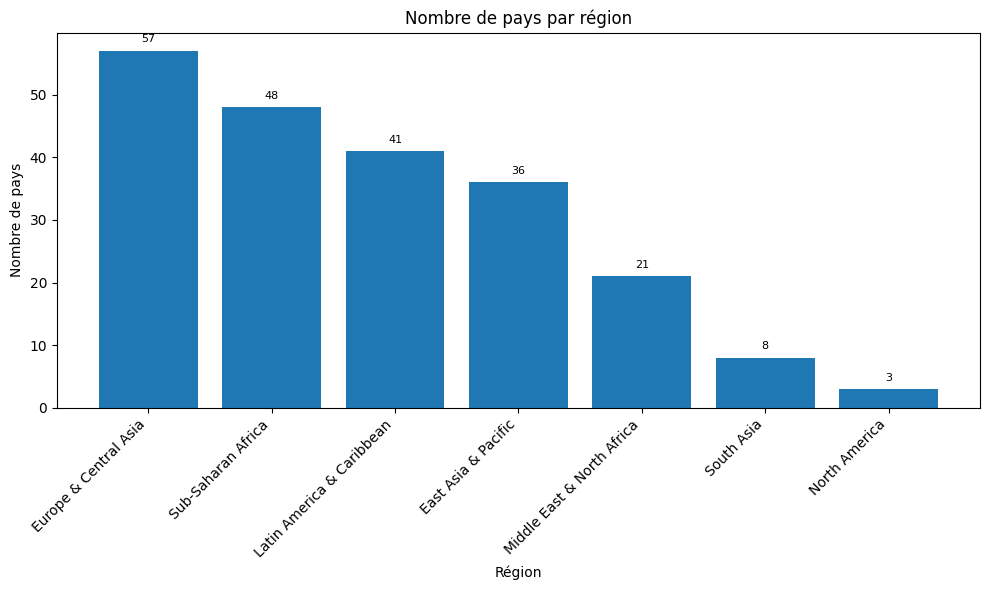

In [41]:
# Compter le nombre de pays par région
pays_par_region = df_country['Region'].value_counts()

# Créer un graphique en barres
plt.figure(figsize=(10, 6))
bars = plt.bar(pays_par_region.index, pays_par_region.values)
plt.title("Nombre de pays par région")
plt.xlabel("Région")
plt.ylabel("Nombre de pays")
plt.xticks(rotation=45, ha='right')

# Annoter les barres avec les valeurs
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [51]:
# Chargement du fichier nettoyé
df_country = pd.read_csv(chemin_clean)

# Liste complète des codes ou noms qui identifient les régions et groupes de revenu
faux_pays_codes = [
    'EUU', 'HIC', 'LIC', 'LMC', 'NAC', 'SAS', 'UMC', 'WLD',
    'EAS', 'ECS', 'LCN', 'MEA', 'SSF', 'MIC', 'INX',
    'ARB', 'CEB', 'CSS', 'EAP', 'ECA', 'EMU', 'FCS', 'HPC',
    'IBD', 'IBT', 'IDA', 'IDX', 'LDC', 'LMY', 'MEA', 'MNA',
    'NOC', 'OED', 'OSS', 'PSS', 'PST', 'SST', 'TSA', 'TSS'
]

# Filtrer les régions et groupes de revenu
faux_pays_liste = df_country[df_country['Country Code'].isin(faux_pays_codes)][['Country Code', 'Short Name']].values.tolist()

# Afficher la liste des régions et groupes de revenu
print("Liste des régions et groupes de revenu (faux pays) :")
for code, name in faux_pays_liste:
    print(f"{code}: {name}")

Liste des régions et groupes de revenu (faux pays) :
ARB: Arab World
EAP: East Asia & Pacific (developing only)
EAS: East Asia & Pacific (all income levels)
ECA: Europe & Central Asia (developing only)
ECS: Europe & Central Asia (all income levels)
EMU: Euro area
EUU: European Union
HIC: High income
HPC: Heavily indebted poor countries (HIPC)
LCN: Latin America & Caribbean (all income levels)
LDC: Least developed countries: UN classification
LIC: Low income
LMC: Lower middle income
LMY: Low & middle income
MEA: Middle East & North Africa (all income levels)
MIC: Middle income
MNA: Middle East & North Africa (developing only)
NAC: North America
OED: OECD members
SAS: South Asia
SSF: Sub-Saharan Africa (all income levels)
UMC: Upper middle income
WLD: World


In [52]:
len(faux_pays_liste)

23

In [56]:
# Afficher le nombre de lignes dans chaque DataFrame clean des valeurs manquantes mais pas encore filtrés
print("Nombre de lignes dans les fichiers CSV nettoyés (pas encore filtrés) :")
print(f"df_country : {len(df_country)}")
print(f"df_country_series : {len(df_country_series)}")
print(f"df_footnote : {len(df_footnote)}")
print(f"df_data : {len(df_data)}")

Nombre de lignes dans les fichiers CSV nettoyés (pas encore filtrés) :
df_country : 241
df_country_series : 613
df_footnote : 643638
df_data : 886930


In [54]:
# Méthode 1 : Filtrer les faux pays en utilisant une liste
df_country_cleaned = df_country[~df_country['Country Code'].isin(faux_pays_codes)]
df_country_series_cleaned = df_country_series[~df_country_series['CountryCode'].isin(faux_pays_codes)]
df_footnote_cleaned = df_footnote[~df_footnote['CountryCode'].isin(faux_pays_codes)]
df_data_cleaned = df_data[~df_data['Country Code'].isin(faux_pays_codes)]

In [55]:
# Afficher le nombre de lignes après le filtrage
print("\nNombre de lignes après le filtrage :")
print(f"df_country_cleaned : {len(df_country_cleaned)}")
print(f"df_country_series_cleaned : {len(df_country_series_cleaned)}")
print(f"df_footnote_cleaned : {len(df_footnote_cleaned)}")
print(f"df_data_cleaned : {len(df_data_cleaned)}")


Nombre de lignes après le filtrage :
df_country_cleaned : 218
df_country_series_cleaned : 613
df_footnote_cleaned : 531605
df_data_cleaned : 802635


In [57]:
# Méthode 2 : Utiliser un inner join
# Joindre les autres DataFrames avec le DataFrame Country nettoyé
df_country_series_joined = df_country_series_cleaned.merge(df_country_cleaned, left_on='CountryCode', right_on='Country Code', how='inner')
df_footnote_joined = df_footnote_cleaned.merge(df_country_cleaned, left_on='CountryCode', right_on='Country Code', how='inner')
df_data_joined = df_data_cleaned.merge(df_country_cleaned, left_on='Country Code', right_on='Country Code', how='inner')

In [58]:
# Afficher le nombre de lignes après le filtrage
print("\nNombre de lignes après le filtrage :")
print(f"df_country_cleaned : {len(df_country_cleaned)}")
print(f"df_country_series_cleaned : {len(df_country_series_cleaned)}")
print(f"df_footnote_cleaned : {len(df_footnote_cleaned)}")
print(f"df_data_cleaned : {len(df_data_cleaned)}")


Nombre de lignes après le filtrage :
df_country_cleaned : 218
df_country_series_cleaned : 613
df_footnote_cleaned : 531605
df_data_cleaned : 802635


In [59]:
# Supprimer les faux pays du DataFrame
df_country_cleaned = df_country[~df_country['Country Code'].isin(faux_pays_codes)]

# Afficher le nombre de pays après suppression des faux pays
nombre_pays = len(df_country_cleaned)
print(f"Nombre de pays après suppression des faux pays : {nombre_pays}")

Nombre de pays après suppression des faux pays : 218


In [60]:
# Enregistrer les DataFrames nettoyés dans de nouveaux fichiers CSV
df_country_cleaned.to_csv(chemin_clean + "EdStatsCountry_clean_filtered.csv", index=False)
df_country_series_cleaned.to_csv(chemin_clean + "EdStatsCountry-Series_clean_filtered.csv", index=False)
df_footnote_cleaned.to_csv(chemin_clean + "EdStatsFootNote_clean_filtered.csv", index=False)
df_data_cleaned.to_csv(chemin_clean + "EdStatsData_clean_filtered.csv", index=False)

print("Les fichiers nettoyés et filtrés ont été enregistrés sous de nouveaux noms.")

Les fichiers nettoyés et filtrés ont été enregistrés sous de nouveaux noms.


## Fichiers générés

- `EdStatsCountry_clean_filtered.csv`
- `EdStatsCountry_clean_filtered.csv` 
- `EdStatsFootNote_clean_filtered.csv`
- `EdStatsData_clean_filtered.csv`

# Exercice Partie 2

# Étape 1 : Réduction du périmètre avec une approche métier

## 1. Identification des catégories d'indicateurs

### Objectif
Identifier la colonne qui décrit la catégorie métier des indicateurs dans le jeu de données.

## 2. Analyse des catégories d'indicateurs

 Identification des catégories d'indicateurs pertinentes

Pour une EdTech qui souhaite s'étendre à l'international, nous devons nous concentrer sur :
- Les indicateurs éducatifs (pour comprendre le système éducatif)
- Les indicateurs technologiques (pour évaluer l'infrastructure numérique)
- Les indicateurs d'infrastructure (pour évaluer les conditions générales)
- Les indicateurs sociaux et du travail (pour comprendre le contexte socio-économique)

## 3.Réduisez le périmètre en utilisant une approche métier

## 4.Réduisez le périmètre en utilisant une approche Data

## Consolider les résultats dans un dataframe (pays, indicateur)

# Exercice partie 3 - Analysez des données de systèmes éducatifs


## Etape 1 : Identifiez les indicateurs redondants d'un point de vue statistique

# Analyse des corrélations entre indicateurs

## Objectif
Identifier les indicateurs fortement corrélés pour :
- Éviter la redondance
- Garder les indicateurs les plus pertinents
- Simplifier l'analyse

## Méthodes utilisées
1. **Corrélation de Pearson** : relation linéaire entre variables
2. **Corrélation de Spearman** : relation monotone (plus robuste aux valeurs extrêmes)

## Seuil et visualisation
- Seuil de corrélation : 70%
- Visualisation par heatmaps et pairplot

## Points d'attention
- Gestion des valeurs manquantes
- Corrélation ≠ causalité
- Choix basé sur la pertinence EdTech

## Etape 2 : Analysez les indicateurs restants et formulez une liste de pays pertinents pour l'implantation d'academy

# Analyse des distributions et sélection des pays

## Objectif
- Analyser la distribution de chaque indicateur
- Identifier les pays les plus pertinents pour l'EdTech
- Proposer une méthode quantitative de sélection

## Méthodologie
- Statistiques descriptives (describe())
- Visualisation des distributions (displot())
- Sélection des pays via top 5 par indicateur